In [4]:
import pandas as pd
import requests
import json
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [5]:
base = 'https://api.coingecko.com/api/v3/'
url = base + 'coins/list'

In [6]:
result = requests.get(url)
result

<Response [200]>

In [7]:
j = result.json()
j

[{'id': '01coin', 'symbol': 'zoc', 'name': '01coin'},
 {'id': '02-token', 'symbol': 'o2t', 'name': 'O2 Token'},
 {'id': '0chain', 'symbol': 'zcn', 'name': '0chain'},
 {'id': '0x', 'symbol': 'zrx', 'name': '0x'},
 {'id': '0xcert', 'symbol': 'zxc', 'name': '0xcert'},
 {'id': '10m-token', 'symbol': '10mt', 'name': '10M Token'},
 {'id': '1337', 'symbol': '1337', 'name': 'Elite'},
 {'id': '1irstcoin', 'symbol': 'fst', 'name': '1irstcoin'},
 {'id': '1million-token', 'symbol': '1mt', 'name': '1Million Token'},
 {'id': '1sg', 'symbol': '1sg', 'name': '1SG'},
 {'id': '1world', 'symbol': '1wo', 'name': '1World'},
 {'id': '1x2-coin', 'symbol': '1x2', 'name': '1X2 Coin'},
 {'id': '2345-star-coin', 'symbol': 'stc', 'name': '2345 Star Coin'},
 {'id': '2acoin', 'symbol': 'arms', 'name': '2ACoin'},
 {'id': '2give', 'symbol': '2give', 'name': '2GIVE'},
 {'id': '300cubits', 'symbol': 'teu', 'name': '300cubits'},
 {'id': '300token', 'symbol': '300', 'name': '300 Token'},
 {'id': '3d-chain', 'symbol': '3d

In [8]:
df_list = pd.DataFrame(j)
df_list.head(10)

,id,name,symbol
0,01coin,01coin,zoc
1,02-token,O2 Token,o2t
2,0chain,0chain,zcn
3,0x,0x,zrx
4,0xcert,0xcert,zxc
5,10m-token,10M Token,10mt
6,1337,Elite,1337
7,1irstcoin,1irstcoin,fst
8,1million-token,1Million Token,1mt
9,1sg,1SG,1sg


In [9]:
# Bitcoin, vs.EUR, 10 Days
# request with explicit paramenters dictionary

url = base + 'coins/bitcoin/market_chart'
param_dict = { 'id':'bitcoin', 'vs_currency':'eur', 'days':10}

result = requests.get(url, params=param_dict)

j = result.json()
df = pd.DataFrame(j['prices'], columns=['time', 'price'])
df.head(10)

,time,price
0,1559905395647,7066.282325
1,1559909029889,7027.286109
2,1559912586672,7002.021076
3,1559916181402,7039.057743
4,1559919794276,7009.130355
5,1559923399818,7025.781937
6,1559926871018,7117.115680
7,1559930690252,7140.455146
8,1559934002760,7127.861176
9,1559937623442,7045.070520


In [10]:
df = pd.DataFrame(j['prices'], columns=['time', 'price'])
df['time'] = pd.to_datetime(df['time'], unit='ms')

df.set_index('time', inplace=True)
df.head(10)

,price
time,
2019-06-07 11:03:15.647,7066.282325
2019-06-07 12:03:49.889,7027.286109
2019-06-07 13:03:06.672,7002.021076
2019-06-07 14:03:01.402,7039.057743
2019-06-07 15:03:14.276,7009.130355
2019-06-07 16:03:19.818,7025.781937
2019-06-07 17:01:11.018,7117.115680
2019-06-07 18:04:50.252,7140.455146
2019-06-07 19:00:02.760,7127.861176


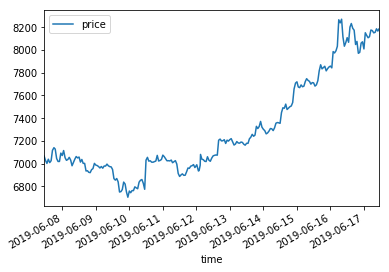

In [11]:
df.plot()

In [12]:
df.groupby(pd.Grouper(freq="d")).mean()

,price
time,
2019-06-07,7056.256736
2019-06-08,7011.385399
2019-06-09,6895.501020
2019-06-10,6912.651585
2019-06-11,6979.474512
2019-06-12,7080.898352
2019-06-13,7226.800652
2019-06-14,7412.385545
2019-06-15,7750.164551
